   # Credit Card - Marketing Strategy based on Segmentation

In [7]:
#Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Importing the data
data =pd.read_csv("C:/Users/Shashi Surya/Desktop/ccdata/CC GENERAL.csv")
# Finding the missing values
missing = data.isna().sum()
#Printing the missing values
print(missing)

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [8]:
# Finding the information about the imported dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

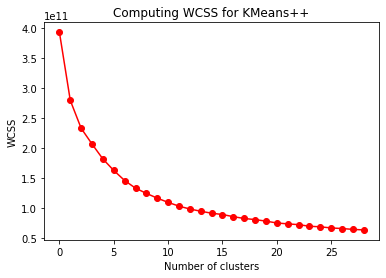

In [2]:
# Filling the missing values with the median values
data = data.fillna( data.median() )

# Removing Customer ID as it is not important and assigning it to Vals
vals = data.iloc[ :, 1:].values

#Importing KMeans

from sklearn.cluster import KMeans
# Use the Elbow method to find a good number of clusters using WCSS
# creating a null matrix wcss
wcss = []

#Iterating and appending it to wcss
for ii in range( 1, 30 ):
    kmeans = KMeans(n_clusters=ii, init="k-means++", n_init=10, max_iter=300) 
    kmeans.fit_predict( vals )
    wcss.append( kmeans.inertia_ )
    
#Creating a plot/graph and labelling X-Axis and Y-Axis
plt.plot( wcss, 'ro-', label="WCSS")
plt.title("Computing WCSS for KMeans++")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

C:\Users\Shashi Surya\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Shashi Surya\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


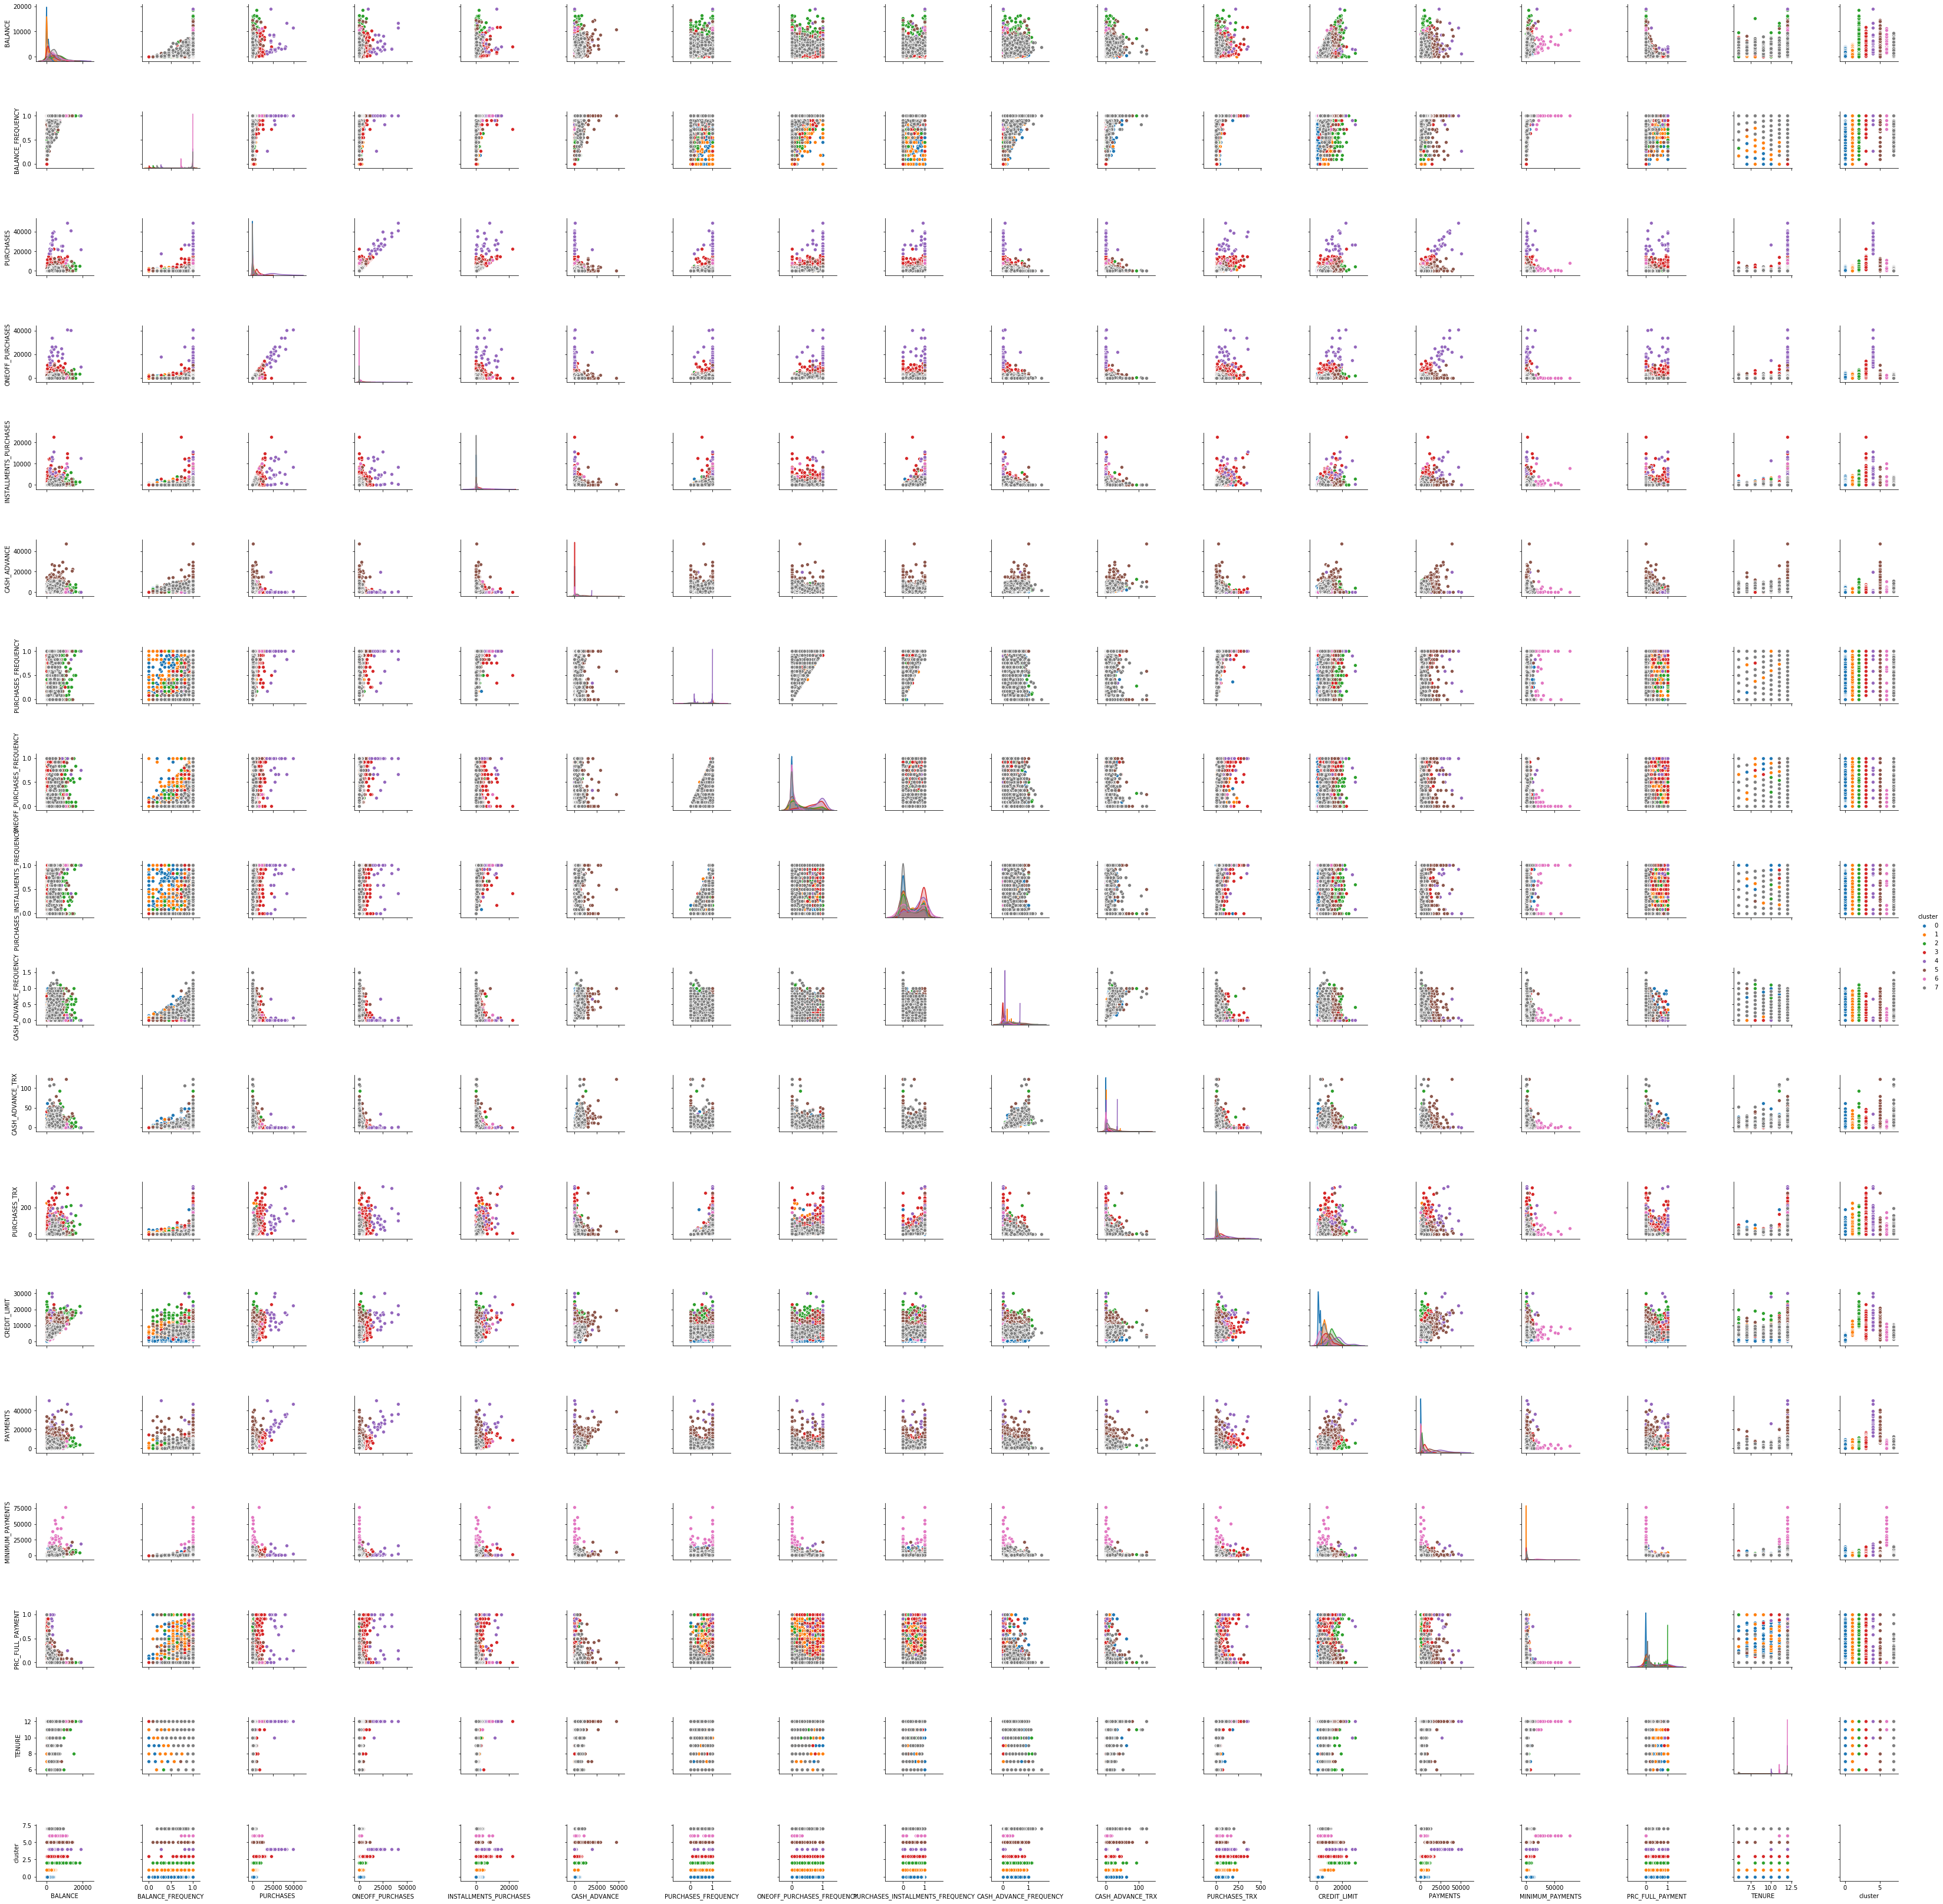

In [3]:
kmeans = KMeans(n_clusters=8, init="k-means++", n_init=10, max_iter=300) 
#kmeans.fit_predict is used for computing cluster centers and predict cluster index for each sample.
y_pred = kmeans.fit_predict( vals )

''' As it's difficult to visualise clusters when the data is high-dimensional - we'll see
if Seaborn's pairplot can help us see how the clusters are separating out the samples.'''
import seaborn as sns
data["cluster"] = y_pred
cols = list(data.columns)
cols.remove("CUST_ID")

sns.pairplot( data[ cols ], hue="cluster")

C:\Users\Shashi Surya\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Shashi Surya\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


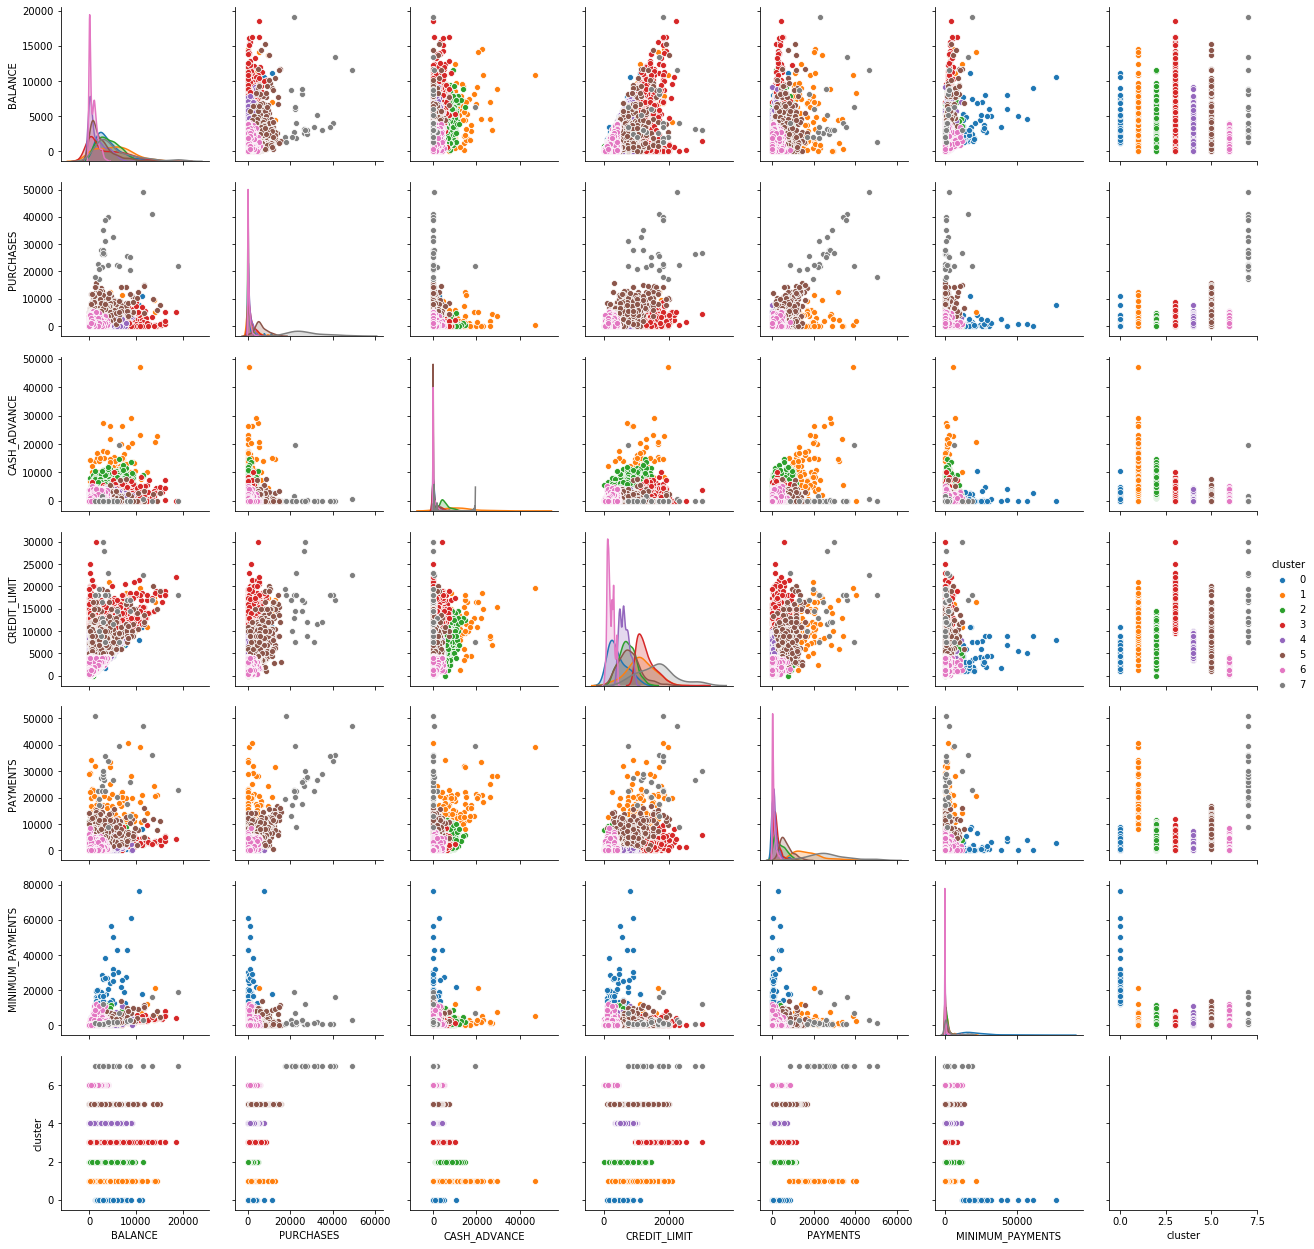

In [4]:
#Considering on the behavioral variables that are required.
best_cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS"]
#Iterating 
kmeans = KMeans(n_clusters=8, init="k-means++", n_init=10, max_iter=300) 
# iloc is used for integer location based indexing
best_vals = data[best_cols].iloc[ :, 1:].values
y_pred = kmeans.fit_predict( best_vals )

data["cluster"] = y_pred
best_cols.append("cluster")
sns.pairplot( data[ best_cols ], hue="cluster")